# Import thư viện

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Thu thập và tiền xử lý dữ liệu

In [6]:
# Load csv
gold_data = pd.read_csv('gld_price_data.csv')

## Giải thích các cột thuộc tính:
* Date: Ngày tháng
* SPX: Giá đóng cửa của chỉ số chứng khoán S&P 500, một chỉ số đại diện cho hiệu suất của 500 công ty lớn nhất niêm yết trên sàn giao dịch chứng khoán Mỹ
* GLD: Giá vàng trên thị trường
* USO: Giá dầu thô trên thị trường
* SLV: Giá bạc trên thị trường
* EUR/USD: Tỉ giá hối đoái giữa giá Euro và Đô la Mỹ

In [7]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


## Số hàng và số cột

In [10]:
gold_data.shape

(2290, 6)

## Thông tin chung về dữ liệu

In [11]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


## Kiểm tra giá trị thiếu

In [12]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

## Kiểm tra giá thị thống kê

In [13]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## Kiểm tra tương quan

### __Tương quan (Correlation)__

* __Định nghĩa__: Tương quan là một thước đo thống kê cho biết mức độ mà hai biến số thay đổi cùng nhau hoặc có mối liên hệ với nhau. Nó không ngụ ý rằng một biến gây ra sự thay đổi của biến kia (tức là không phải quan hệ nhân quả), mà chỉ đơn thuần là sự liên kết.
* __Phạm vi__: Tương quan thường được đo bằng hệ số tương quan Pearson (Pearson's correlation coefficient), có giá trị từ -1 đến 1:
  * __1__: Tương quan thuận hoàn hảo.
  * __0__: Không có tương quan (hai biến không liên quan).
  * __-1__: Tương quan nghịch hoàn hảo.
* __Ứng dụng trong Machine Learning__: Tương quan giúp xác định các đặc trưng (features) quan trọng trong dữ liệu, loại bỏ các đặc trưng dư thừa, hoặc hiểu rõ hơn về mối quan hệ giữa các biến.

### __Tương quan thuận (Positive Correlation)__

* __Định nghĩa__: Tương quan thuận xảy ra khi hai biến tăng hoặc giảm cùng chiều với nhau. Nghĩa là nếu biến A tăng thì biến B cũng tăng, và nếu biến A giảm thì biến B cũng giảm.
* __Ví dụ__: 
  * Số giờ học và điểm số: Khi số giờ học tăng, điểm số thường tăng theo.
  * Nhiệt độ và lượng kem bán được: Nhiệt độ cao hơn thì doanh số kem thường cao hơn.
* __Hệ số tương quan__: Giá trị từ 0 đến 1 (càng gần 1 thì tương quan thuận càng mạnh).
* __Biểu đồ__: Trên biểu đồ phân tán (scatter plot), các điểm dữ liệu có xu hướng tạo thành một đường dốc lên từ trái sang phải.

### __Tương quan nghịch (Negative Correlation)__

* __Định nghĩa__: Tương quan nghịch xảy ra khi hai biến thay đổi ngược chiều nhau. Nghĩa là nếu biến A tăng thì biến B giảm, và ngược lại.
* __Ví dụ__: 
  * Số giờ ngủ và mức độ mệt mỏi: Ngủ ít hơn thì mệt mỏi tăng lên.
  * Giá sản phẩm và nhu cầu mua: Giá tăng thì nhu cầu thường giảm.
* __Hệ số tương quan__: Giá trị từ -1 đến 0 (càng gần -1 thì tương quan nghịch càng mạnh).
* __Biểu đồ__: Trên biểu đồ phân tán, các điểm dữ liệu có xu hướng tạo thành một đường dốc xuống từ trái sang phải.

### Tính tương quan trong Pandas
Để tính tương quan trong Pandas cần dùng phương thức DataFrame.corr()
* __Tham số__:
  * method: Phương pháp tính tương quan. Các tùy chọn:
    * 'pearson' (mặc định): Tương quan tuyến tính.
    * kendall': Tương quan Kendall Tau (dựa trên thứ hạng).
    * spearman': Tương quan Spearman (dựa trên thứ hạng, phi tuyến tính).
  * min_periods: Số lượng giá trị tối thiểu cần thiết để tính tương quan (mặc định là 1).
  * numeric_only: Nếu True, chỉ tính tương quan cho các cột số (bỏ qua cột không phải số như chuỗi hoặc ngày tháng).

* __Đầu ra__: Trả về một DataFrame chứa ma trận tương quan, trong đó:
  * Các hàng và cột là tên các cột trong DataFrame gốc.
  * Giá trị trên đường chéo chính luôn là 1 (tương quan của một cột với chính nó).

In [15]:
correlation = gold_data.corr(numeric_only= True)

### Xây dựng một heatmap để biểu diễn tương quan

<Axes: >

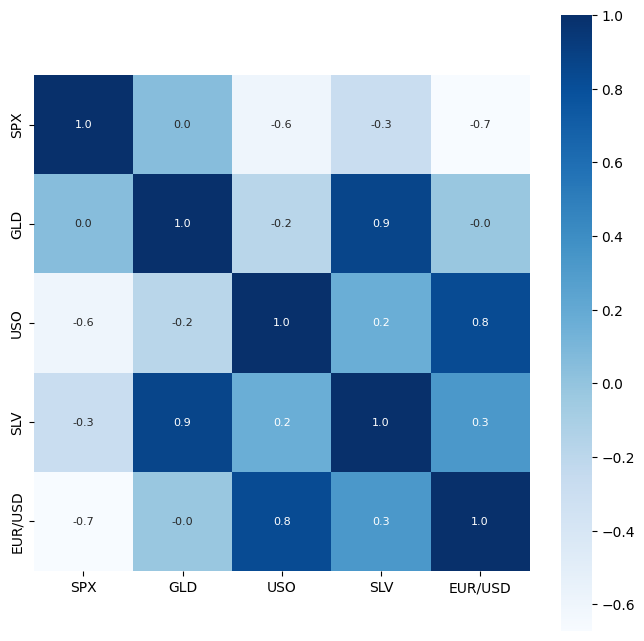

In [17]:
plt.figure(figsize= (8,8))
sns.heatmap(correlation, 
            cbar= True, 
            square= True, 
            fmt= '.1f', 
            annot= True, 
            annot_kws= {'size': 8}, 
            cmap= 'Blues')

Từ heatmap trên ta thấy: 
* Giá vàng và giá bạc có tương quan thuận, tức khi giá vàng tăng thì giá bạc cũng tăng theo
* Chỉ số USO và SPX có tương quan nghịch, tức nếu USO tăng thì SPX giảm

### Lấy tương quan của giá vàng

In [18]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


### Xem phân phối của giá vàng

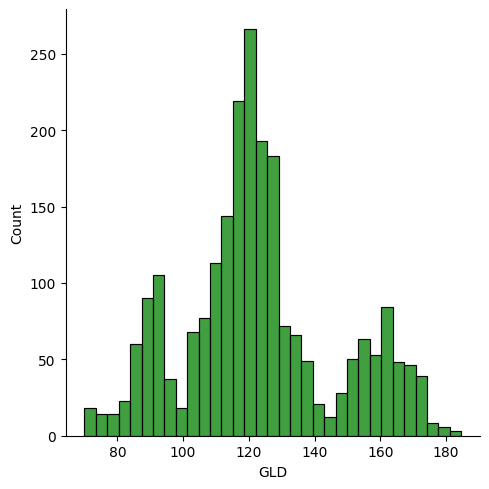

In [19]:
sns.displot(data= gold_data['GLD'],
            color= 'green',)

# Phân tách đặc trưng

In [23]:
# axis = 1: Thao tác xóa được thực hiện theo cột
# axis = 0: Thao tác xóa được thực hiện theo hàng
X = gold_data.drop(['Date', 'GLD'], axis= 1)
Y = gold_data['GLD']

In [24]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [25]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Chia thành tập train, test

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 2)

# Huấn luyện mô hình: RandomForest

In [27]:
# Xây dựng mô hình RandomForest gồm 100 DecisionTree
regr = RandomForestRegressor(n_estimators= 100)

In [28]:
regr.fit(X= X_train, y= Y_train)

RandomForestRegressor()

# Đánh giá mô hình

In [29]:
test_data_prediction = regr.predict(X= X_test)

In [30]:
print(test_data_prediction)

[168.48889939  81.95399988 116.03099948 127.56920038 120.67750145
 154.83469788 150.27759839 126.23460036 117.39079881 125.93410112
 116.57930091 171.56930113 141.56519914 168.1388983  115.16210017
 117.82170077 139.43720291 170.32190099 159.59880316 160.98490013
 155.15859995 125.7526002  174.05340084 156.82570393 125.20090038
  93.68369985  76.95589991 120.48719997 119.09999926 167.4276994
  88.30310046 125.18449967  91.03370074 117.83549991 121.14109877
 136.11090092 115.28620131 115.3456008  148.20800035 107.22350108
 104.48870269  87.1052978  126.50280043 118.08570012 152.97999874
 119.64540023 108.44699995 108.08669833  93.29520055 127.04709775
  75.00670039 113.64299973 121.23679985 111.23189875 118.95589892
 120.95899918 159.31269998 168.54580157 146.81409712  85.98759865
  94.32070034  86.76109876  90.6357     118.98840099 126.41390093
 127.53779973 169.64700024 122.23219923 117.42819892  98.66100006
 168.55670083 143.241998   131.81570236 121.12490218 120.59119966
 119.617500

## Đánh giá mô hình sử dụng tham số R square

In [31]:
error_score = metrics.r2_score(y_true= Y_test,
                               y_pred= test_data_prediction)
print("R Square error: ", error_score)

R Square error:  0.9900709490132872


## So sánh giá trị thực và giá trị dự đoán

In [32]:
Y_test = list(Y_test)

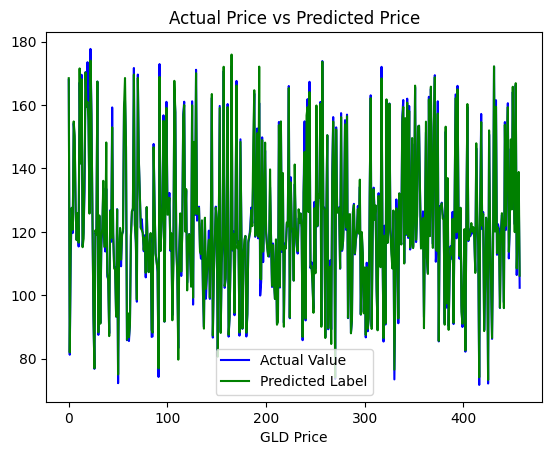

In [38]:
plt.plot(Y_test, color= 'blue', label='Actual Value')
plt.plot(test_data_prediction, color= 'green', label= 'Predicted Label')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.xlabel('GLD Price')
plt.legend()
plt.show()